In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
billionares = pd.read_csv('C:/Users/iamda/Downloads/Billionaires Statistics Dataset.csv')
billionares.head()

#dataset of the worlds billionares with variables related to location, age, industry,rank, gender, etc

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [4]:
display(billionares.head())
print(billionares.shape)

#there's 35 columns with pretty detailed information. I'm only really looking to understand the connections between age, gender, maybe self-made status, and networth.

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


(2640, 35)


In [22]:
billionares = billionares[billionares['country'] == 'United States']
#narrowing the focus to billionares in the United States

KeyError: 'country'

In [21]:
billionares = billionares[['rank','finalWorth','personName','age','selfMade','gender','state']]
billionares.head()
#Dropping columns I don't need

,rank,finalWorth,personName,age,selfMade,gender,state
1,2,180000,Elon Musk,51.0,True,M,Texas
2,3,114000,Jeff Bezos,59.0,True,M,Washington
3,4,107000,Larry Ellison,78.0,True,M,Hawaii
4,5,106000,Warren Buffett,92.0,True,M,Nebraska
5,6,104000,Bill Gates,67.0,True,M,Washington


In [24]:
billionares=billionares.copy()
billionares.rename(columns = {'finalWorth' : 'net_worth', 
                          'personName' : 'name', 
                          'selfMade' : 'selfmade_status'},
               inplace = True)
billionares.dropna()
billionares.head()

#renaming some columns to look cleaner and dropping na values

,rank,net_worth,name,age,selfmade_status,gender,state
1,2,180000,Elon Musk,51.0,True,M,Texas
2,3,114000,Jeff Bezos,59.0,True,M,Washington
3,4,107000,Larry Ellison,78.0,True,M,Hawaii
4,5,106000,Warren Buffett,92.0,True,M,Nebraska
5,6,104000,Bill Gates,67.0,True,M,Washington


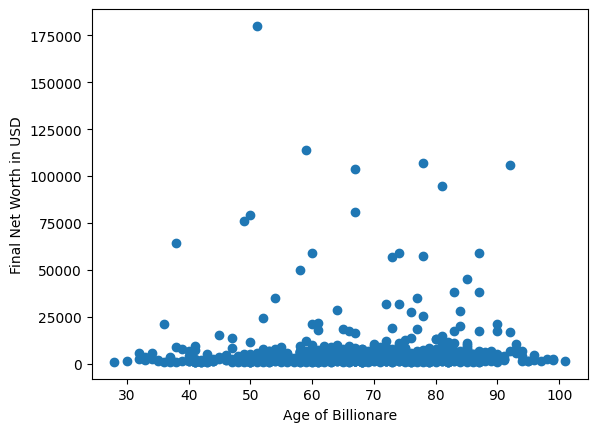

In [26]:
plt.scatter(billionares['age'], billionares['net_worth'])
plt.xlabel('Age of Billionare')
plt.ylabel('Final Net Worth in USD')
plt.show()

#creating a scatterplot to explore the connectin between a billionare's age and their net worth

In [28]:
#!pip install seaborn
import seaborn as sns

Text(41.01594444444443, 0.5, 'Final Net Worth in USD')

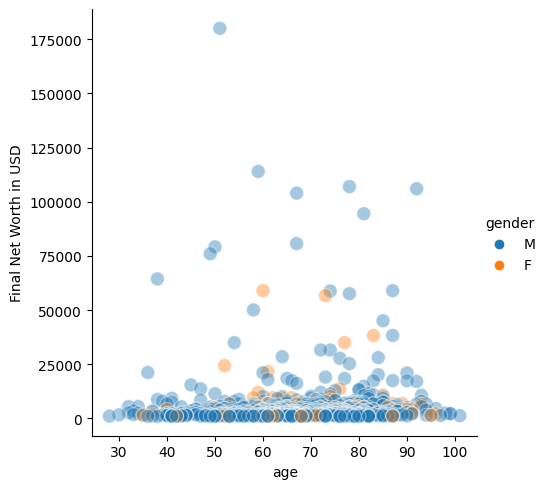

In [51]:
sns.relplot(x='age', y='net_worth', hue="gender", s=100, alpha=.4, data=billionares)
plt.ylabel('Final Net Worth in USD')

#creating a scatterplot with age and networth again but coding by gender. Seems like roughly the top 10 US billionares are men that vary across the age scale. Sorry, women :/ 